# Практическая работа №3: Статистический анализ социальных сетей
Выполнил студент гр. 0381 Захаров Филипп. Вариант №4

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения

**Диада** $-$ элемент сети, представляющий собой пару акторов и (возможную) связь между ними:<br>
$D_{ij}=(X_{ij}, X_{ji}), i\neq j$.

**Цензус диад** $-$ тройка чисел $M, A, N$, где:

Вычисление цензуса:  
$M = \frac{1}{2} trace(𝐗𝐗)$  
$A = trace(𝐗𝐗^{T}) - 2M$  
$N = C_g^2 - A - M$  

**Индекс взаимности Каца-Пауэлла** (Reciprocity of Katz and Powell) $-$ характеристика измерения тенденции акторов в группе. Данный индекс оценивает тенденцию акторов в группе к взаимному выбору друг друга. 

$-\infty < \rho_{кр} \leqslant 1$.

Индекс взаимности основан на ожидании количества взаимных диад, предполагая, что выбор делается акторами случайным образом. Выбор может быть фиксированным или свободным.

Для фиксированного выбора из $d$ акторов:

$\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)M - gd^2}{gd(g - d - 1)}}$.

Вероятность того, что связь будет взаимной для двух акторов:

$\displaystyle{P(i \rightarrow j \wedge j \rightarrow i) = \frac{d}{g - 1}\left( \frac{d}{g - 1} + \rho_{кр} \frac{g - 1 - d}{g - 1} \right)}.$

Для свободного выбора:

$\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)^2M - L^2 + L_2}{L(g - 1)^2 - L^2 - L_2}}$.

Вероятность того, что связь будет взаимной для двух акторов (для каждого из акторов):

$P = \displaystyle{\frac{x_{i+}x_{j+}}{(g - 1)^2}}$.

**Индекс взаимности Бандиопадхьяйя** - индекс, основанный на максимальной и минимальной значениях количества диад в сети. 

$\rho_B = \displaystyle{\frac{M - M_{\min}}{M_{\max} - M_{\min}}}$,

где $M_{\min} = \max f(t), 0 \leqslant t \leqslant g$, 

$M_{\max} = \lfloor 0.5 \sum^g_{i = 1} x_{i+} - \max g(t)\rfloor, 0 \leqslant t \leqslant g$,

$f(t) = \sum^t_{i=1} x_{i+} - t(g - 1) - C^2_g$,

$g(t) = \sum^t_{i=1} x_{i+} - t(t - 1) - \sum^g_{i=t+1} \min (t, x_{i+})$.

**Вычисление доверительного интервала для оценки P:**

Оценка параметра $P$:

$\hat{P} = \displaystyle{\frac{\sum_{i = 1}^g \sum_{j = 1}^g x_{ij}}{g(g-1)} = \frac{l}{g(g - 1)}}$.

ДИ: $\hat{P}_{lower} \leqslant P \leqslant \hat{P}_{upper}$.

$\hat{P}_{lower} = \displaystyle{\hat{P} - z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$\hat{P}_{upper} = \displaystyle{\hat{P} + z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$z_{\alpha/2}$ вычисляется из $\Phi(z_{\alpha/2}) = 0.5 - 0.5 \alpha$, где $\alpha$ - некоторый уровень значимости, $(1 - \alpha)$ - доверительная надёжность. 

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

Перед началом работы импортируем необходимые библиотеки и определим константы.

In [1]:
install.packages("DescTools")
library(DescTools)
library(igraph)

Устанавливаю пакет в 'C:/Users/Filip/AppData/Local/R/win-library/4.2'
(потому что 'lib' не определено)



пакет 'DescTools' успешно распакован, MD5-суммы проверены

Скачанные бинарные пакеты находятся в
	C:\Users\Filip\AppData\Local\Temp\RtmpmuREw3\downloaded_packages


Warning message:
"пакет 'DescTools' был собран под R версии 4.2.2"
Warning message:
"пакет 'igraph' был собран под R версии 4.2.2"

Присоединяю пакет: 'igraph'


Следующий объект скрыт от 'package:DescTools':

    %c%


Следующие объекты скрыты от 'package:stats':

    decompose, spectrum


Следующий объект скрыт от 'package:base':

    union




In [2]:
g = 68;
p = 0.68;
P_0 = 0.78;
alpha = 0.02;

##### 1. С помощью библиотеки igraph смоделировать случайный орграф G𝑑 на основе модели Эрдеша—Реньи: G𝑑 = G (𝑔, 𝑝), где 𝑔 – количество акторов, 𝑝 – вероятность появления дуги между акторами. В R для модели случайного графа Эрдеша—Реньи существует функция erdos.renyi.game(). Ознакомьтесь с данной моделью и опишите её.

In [3]:
graph <- erdos.renyi.game(g, p, directed=TRUE)

##### 2. Отобразить полученный орграф

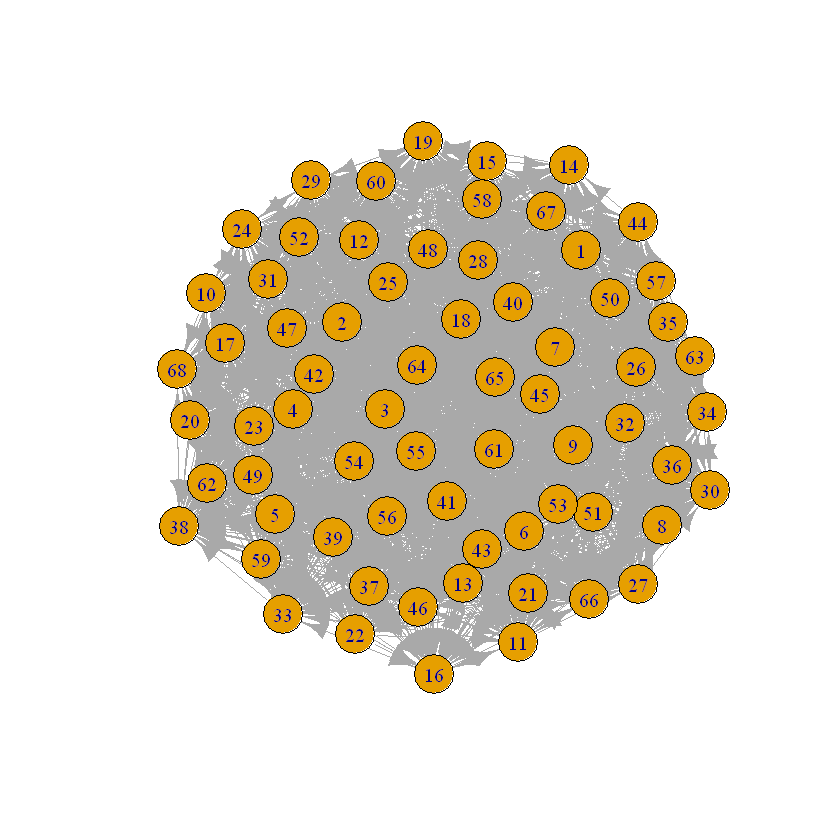

In [4]:
plot(graph)

##### 3. Вычислить «пятичисловую сводку» для графа G𝑑.

In [5]:
s = length(V(graph))
cat("Размер:", s, '\n')

cat("Плотность:", length(E(graph)) / choose(s, 2), "\n")

cat("Компоненты сильной связности: ", count_components(graph, mode = "strong"), "\n") 
 
cat("Диаметр сети:", diameter(graph), "\n")

cat("Коэффициент кластеризации:", transitivity(graph))

Размер: 68 
Плотность: 1.372695 
Компоненты сильной связности:  1 
Диаметр сети: 2 
Коэффициент кластеризации: 0.9030294

##### 4. Вычислить цензус диад. Сделать выводы.

In [6]:
dc = dyad_census(graph)
dc

$mut
[1] 1071

$asym
[1] 985

$null
[1] 222

В сети почти поровну акторов со взаимными и односторонними связями. И почти нет акторов без связей. Если посчитать вероятность появления ребра, то всегда получается примерно 68 процентов (как по условию).

##### 5. Вычислить оценку индекса взаимности Каца—Пауэла при фиксированом выборе акторов 𝑑 и при свободном выборе. Сделать выводы.

In [7]:
d = 68
ind_kp = (2 * (g - 1) * dc$mut - g * d^2) / (g * d * (g - 1 - d))

In [8]:
x = as.matrix(as_adjacency_matrix(graph))
x_plus = rowSums(x)
L_x = sum(x)
L_2_x = sum(x_plus**2)

ind_kp_free <- (2 * (g - 1)^2 * dc$mut - L_x^2 + L_2_x) / (L_x * (g - 1)^2 - L_x^2 + L_2_x)

cat("Коэффициент Каца-Пауэла при d=68 равен", ind_kp, '\n')
cat("Коэффициент Каца-Пауэла при свободном выборе равен", ind_kp_free)

Коэффициент Каца-Пауэла при d=68 равен 36.96324 
Коэффициент Каца-Пауэла при свободном выборе равен -0.004064704

##### 6. Вычислить вероятность того, что связь будет взаимной для каждого случая.

In [9]:
Pij = (d / (g - 1)) * (d / (g - 1) + ind_kp * ((g - 1 - d) / (g - 1)))
cat("При фиксированном выборе вероятность взаимной связи: ", Pij)

При фиксированном выборе вероятность взаимной связи:  0.4701493

##### 7. Вычислить индекс взаимности Бандиопадхьяйя. Сделать выводы.

In [10]:
adj_matrix = as.matrix(as_adjacency_matrix(graph))

g_func <- function(row_sum, g, t) {
    xi_sum <- sum(row_sum[1:t])
    min_sum <- 0   
    for (i in (t + 1):g) {
        min_sum <- min_sum + min(c(t, row_sum[i]))
    }
    res = xi_sum - t * (t - 1) - min_sum
    return(res)
}

f_func <- function(row_sum, g, t) {
    xi_sum = sum(row_sum[1:t])
    combination <- factorial(t) / (factorial(2) * factorial(t - 2))
    res = xi_sum - t * (g - 1) - combination 
    return(res)
}

row_sum = rowSums(adj_matrix)

g_res = rep(2, g - 1)
for (t in 2:(g - 1)) {
    g_res[t] = g_func(row_sum, g, t)
}

f_res = rep(2, g)
for (t in 2:g) {
    f_res[t] = f_func(row_sum, g, t)
}

m_max = floor(0.5 * sum(row_sum[1:g]) - max(g_res))
m_min = max(f_res)

band_index = (dc$mut - m_min) / (m_max - m_min)
cat("индекс взаимности Бандиопадхьяйя равен:", band_index)
reciprocity(graph)

индекс взаимности Бандиопадхьяйя равен: 0.685696

[1] 0.6850016

Акторы склонны образовывать взаимные связи с вероятностью, данной по условию задачи.

##### 8. Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе G𝑑 имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔 − 1), 1/2) при уровне значимости 𝛼. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.


In [11]:
l = sum(adj_matrix)
test = binom.test(l, g * (g - 1), p = 0.5)

cat("Гипотеза верна:", test$p.value >= 0.05, "\n")
cat("Максимальный уровень значимости:", test$p.value)

Гипотеза верна: FALSE 
Максимальный уровень значимости: 7.580397e-143

##### 9. Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе G𝑑 имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔−1), 𝑃0) при уровне значимости 𝛼. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.

In [12]:
l = sum(adj_matrix)
test = binom.test(l, g * (g - 1), p = P_0)

cat("Гипотеза верна:", test$p.value >= 0.05, "\n")
cat("Максимальный уровень значимости:", test$p.value)

Гипотеза верна: FALSE 
Максимальный уровень значимости: 2.297038e-48

##### 10. Построить доверительный интервал для оценки параметра 𝑝 с доверительной надёжностью (1 − 𝛼). Сделать выводы.

In [13]:
l = sum(adj_matrix)
ans = BinomCI(l,  g * (g - 1), conf.level = 1 - alpha)

cat("Значение оценки параметра p:",ans[1],"\n")
cat("Доверительный интервал: [",ans[2],"; ",ans[3],"]\n")

Значение оценки параметра p: 0.6863477 
Доверительный интервал: [ 0.6701434 ;  0.7021098 ]


Доверительный интеграл вычислен верно

## Выводы

В ходе выполнения практической работы, был запрограммирован статистический анализ случайного графа средставми языка R. Был сгенерирован и визуализирован сам граф, посчитана пятичисловая сводка, цензус диад, индекс взаимности Бандиопадхьяйя двумя способами, и построен доверительный интервал для оценки параметра p.